# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### План работы:
1. Откроем файл с данными и изучим общую информацию, построим гистограммы для столбцов с численными значениями.
2. Выполним предобработку данных, попробуем заполнить пропуски, устранить неявные дубликаты, исправить или удалить аномальные значения.
3. Проведем исследовательский анализ данных, изучим следующие параметры объектов:
общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
этаж квартиры;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего аэропорта;
расстояние до ближайшего парка;
день и месяц публикации объявления.
4. Изучим, как быстро продавались квартиры.
5. Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучим, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
6. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
7. Для квартир в Санкт-Петербурге вычислим среднюю цену каждого километра.
8. Напишем вывод о полученной информации.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраните в переменную data
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import pandas as pd
try:
    data = pd.read_csv('dataset_estate.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

pd.set_option('display.max_columns', None)

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
# Изучим общую информацию о данных в таблице
data.info()
# Бросается в глаза большое количество пропусков в столбцах ceiling_height, balcony, parks_nearest, ponds_nearest 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

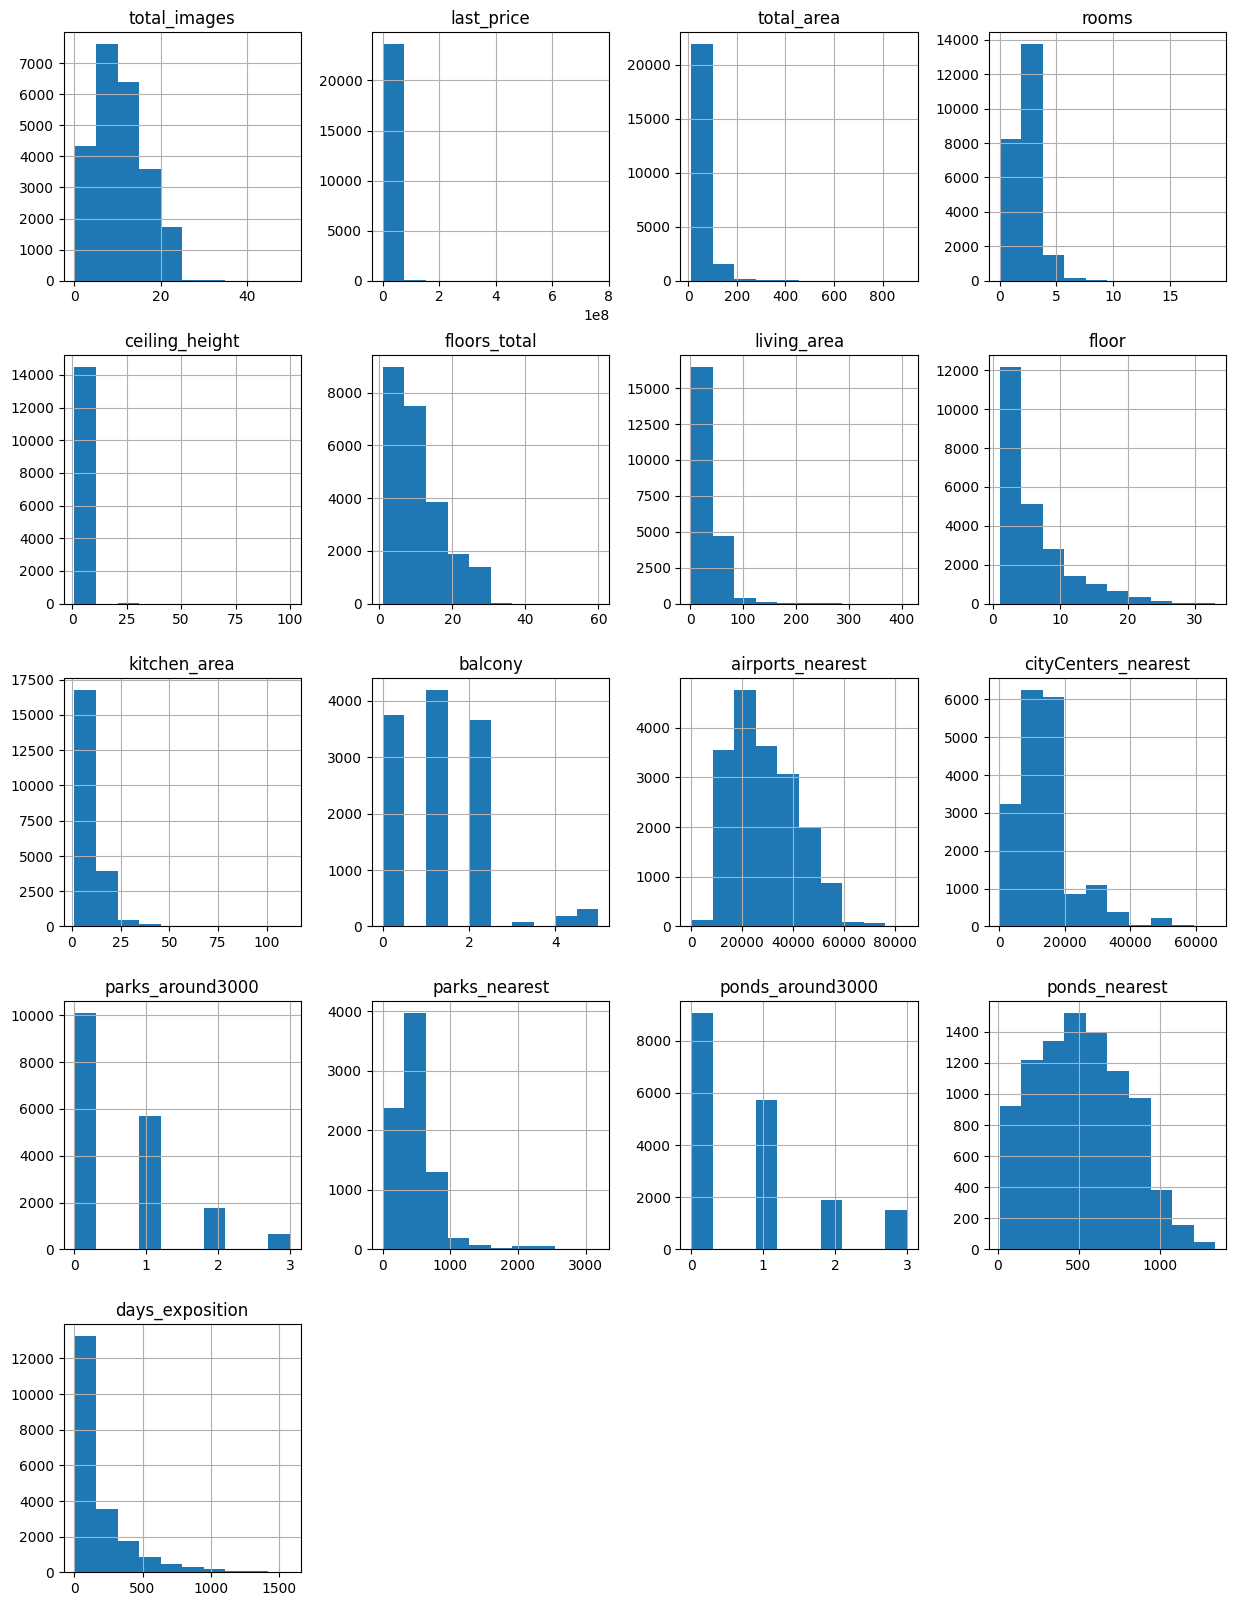

In [4]:
# Построим диаграммы для всех числовых столбцов таблицы
data.hist(figsize=(15, 20));

**Вывод: мы прочитали файл и получили первое представление о данных.
Бросается в глаза большое количество пропусков в столбцах ceiling_height, balcony, parks_nearest, ponds_nearest.
Также подозрительно выглядят гистограммы для столбцов total_area, last_price.**

### Предобработка данных

In [5]:
# Проверим сколько пропусков есть в нашей таблице
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# Посчитаем долю пропусков
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,38.8
floors_total,0.4
living_area,8.0
floor,0.0
is_apartment,88.3


**Попробуем уменьшить количество пропусков в таблице. Жизненный опыт и логика подсказывают, что:**
1. Жилая площадь напрямую зависит от общей площади квартиры.
2. Если не указано, количество балконов, то можно предположить, что их количество равно нулю.
3. Также попробуем заполнить пропуски в столбце с высотой потолка.

In [7]:
# Проверяем нашу догадку о том, что жилая площадь напрямую зависит от общей площади квартиры
print(data['living_area'].corr(data['total_area']))

0.9395373338721493


In [8]:
# Заполним пропуски в столбце living_area медианными значениями для каждого типа занятости living_area.
for t in data['total_area'].unique():
    data.loc[(data['total_area'] == t) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['total_area'] == t), 'living_area'].median()

In [9]:
# Заполним пропуски в столбце balcony нулями.
data['balcony'] = data['balcony'].fillna(0)

In [10]:
# Проверим, сколько пропусков удалось убрать.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area               143
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [11]:
# Заполним пропуски в столбце ceiling_height медианными значениями
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

**На данном этапе тяжело однозначно указать причину пропусков в данных. Можно предположить, что клиенты, когда заполняли объявление о продаже квартиры, просто не владели всей информацией о квартире и поэтому оставили часть полей пустыми.**

In [12]:
# Выведем типы данных в каждом столбце таблицы
print(data.dtypes)

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object


In [13]:
# Поменяем тип данных в столбцах balcony и last_price
convert_dict = {'last_price' : int, 'balcony' : int}
data = data.astype(convert_dict)

In [14]:
# Проверим, что изменение данных прошло корректно 
data.dtypes

total_images              int64
last_price                int32
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   int32
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [15]:
# Уберем неявные дубликаты из столбца locality_name
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок').str.replace('городской поселок', 'поселок').str.replace('поселок при железнодорожной станции', 'поселок станции')
data['locality_name'] = data['locality_name'].replace('поселок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')

data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'д

#### Пробуем убрать аномальные и выбивающиеся значения из таблицы

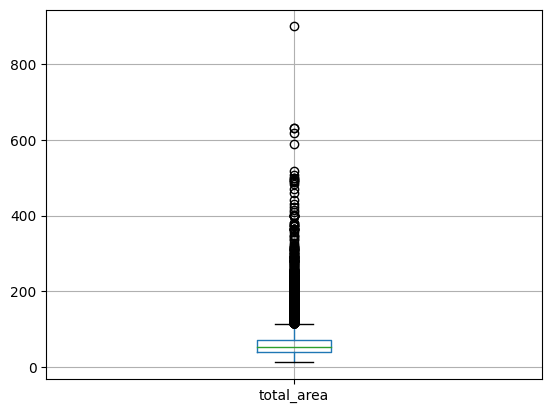

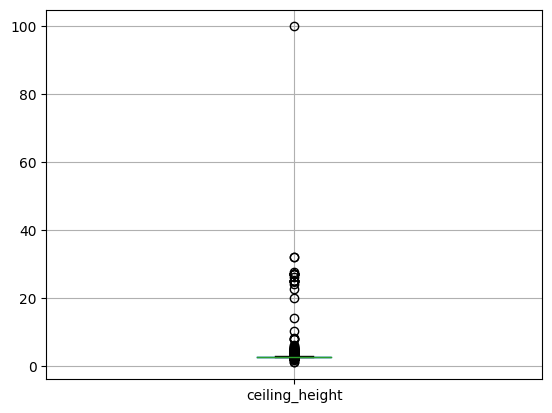

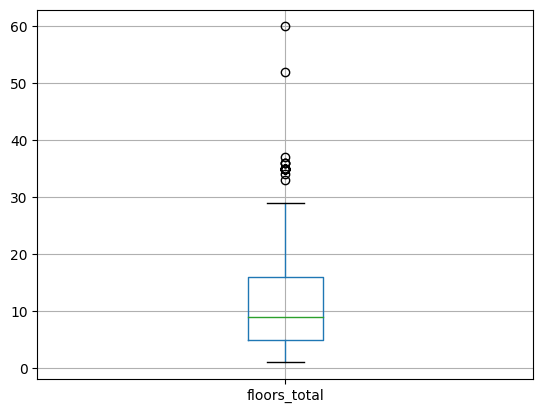

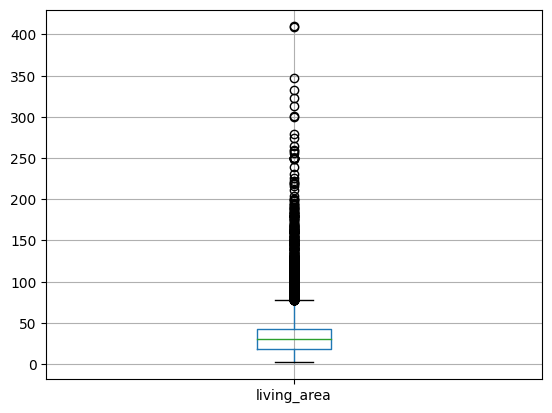

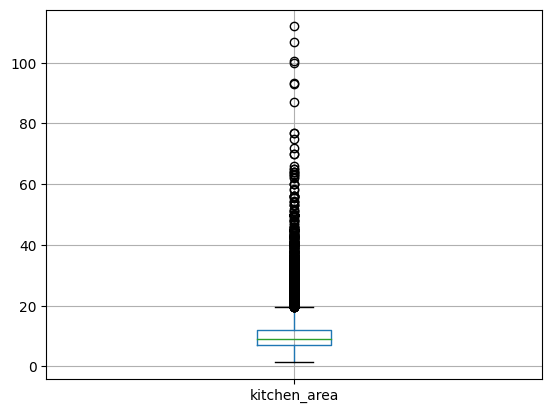

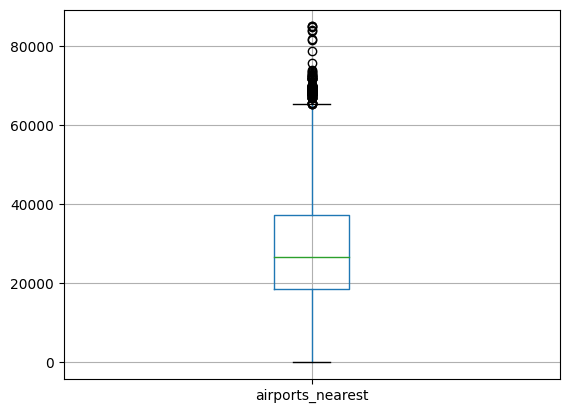

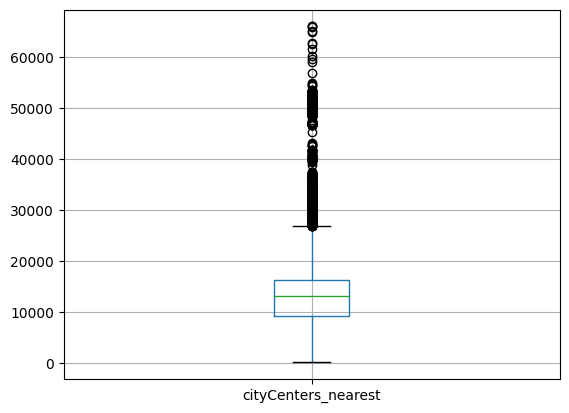

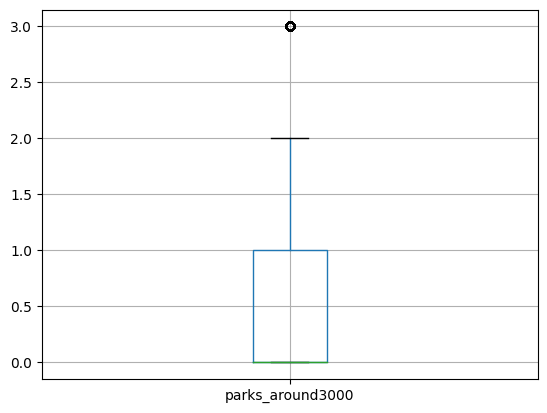

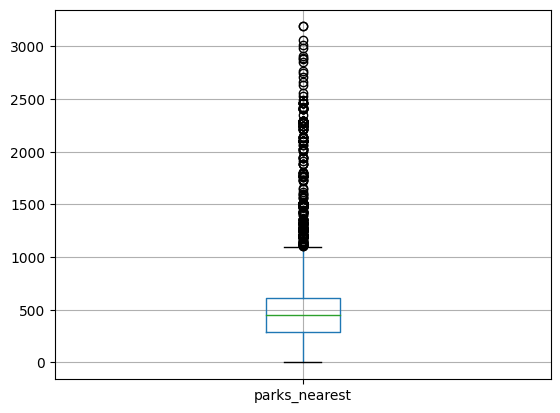

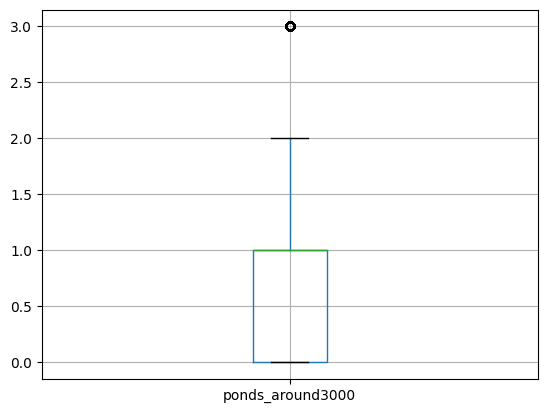

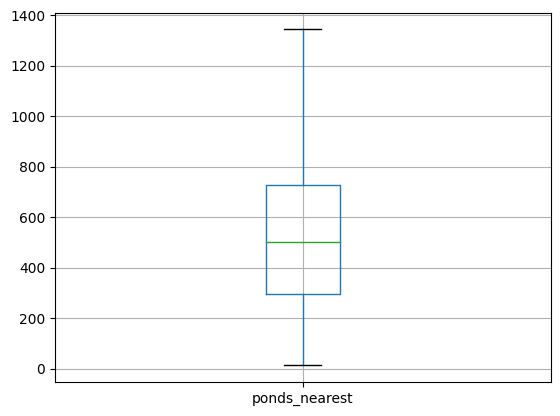

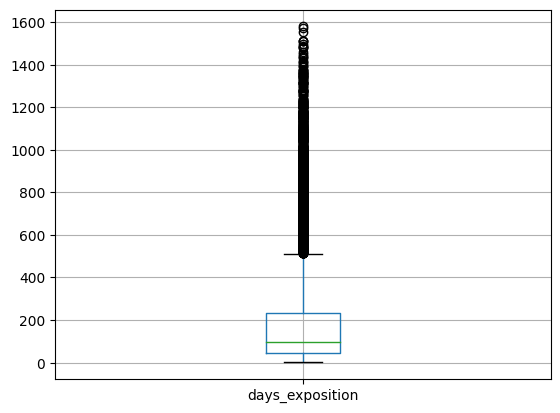

In [16]:
# Сначала для столбцов с типами данных float, int построим диаграмму размаха данных
for i in data.select_dtypes(include=['float64']).columns:
    plt.figure()
    data.boxplot([i])

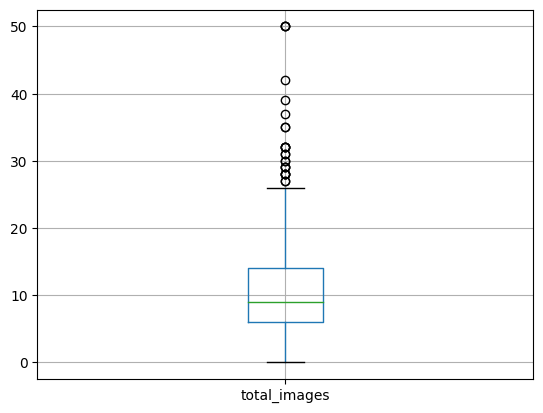

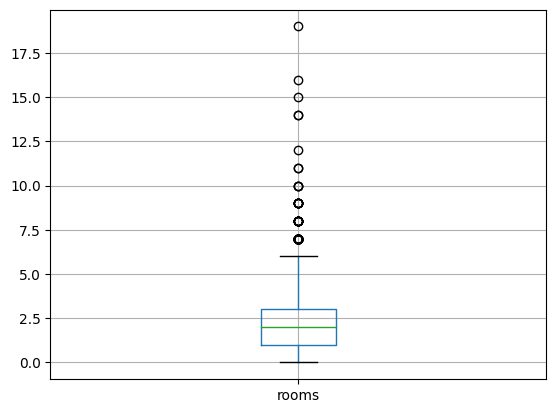

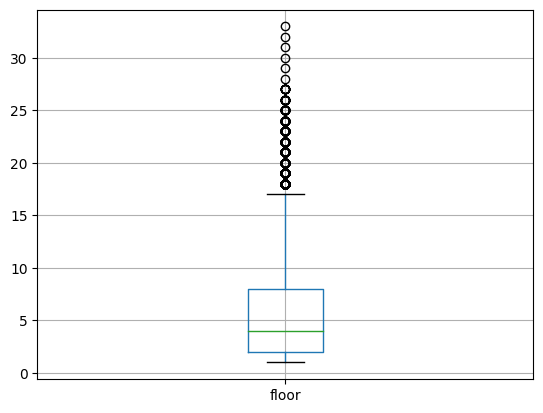

In [17]:
for j in data.select_dtypes(include=['int64']).columns:
    plt.figure()
    data.boxplot([j])

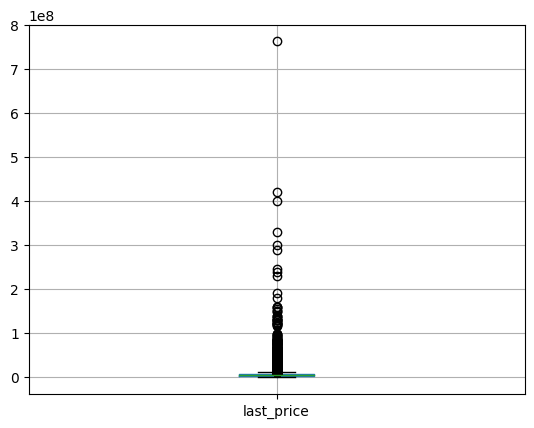

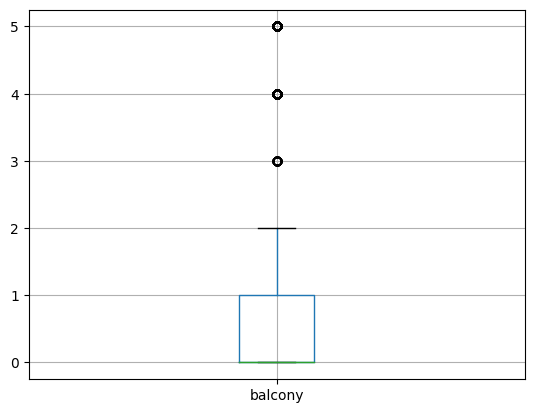

In [18]:
for k in data.select_dtypes(include=['int32']).columns:
    plt.figure()
    data.boxplot([k])

#### Разбираемся со столбцом total_area

In [19]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

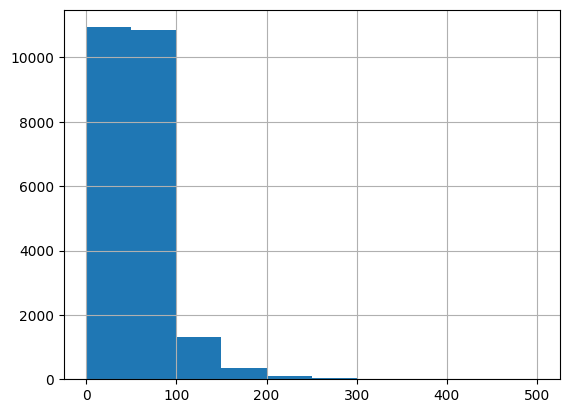

In [20]:
# Построим гистограмму, чтобы увидеть, какие данные встречаются реже всего, чтобы потом отсечь их
data['total_area'].hist(range=(0, 500))

**По гистограмме видно, что значения большее 200 в столбце практически не встречаются.**

In [21]:
# Посчитаем для столбца total_area границы значений, после которых начинаются выбросы
q75_total_area, q25_total_area = data['total_area'].quantile([0.75, 0.25])
iqr_total_area = q75_total_area - q25_total_area
lower_range_total_area = q25_total_area - 1.5 * iqr_total_area
upper_range_total_area = q75_total_area + 1.5 * iqr_total_area

print(iqr_total_area)
print(lower_range_total_area)
print(upper_range_total_area)

29.900000000000006
-4.8500000000000085
114.75000000000001


In [22]:
# Визуально взглянем на таблицу, отсортированную по убыванию по столбцу total_area, 
# возможно удастся увидеть какую-то явную ошибку в данных. 
data.sort_values(by='total_area', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000,900.00,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,False,False,112.00,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
12859,20,140000000,631.20,2019-04-09T00:00:00,7,3.90,4.0,322.3,4,NaN,False,False,19.50,1,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
3117,19,140000000,631.00,2019-03-30T00:00:00,7,2.65,5.0,NaN,5,NaN,False,False,60.00,0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
15651,20,300000000,618.00,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,False,False,70.00,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
5358,20,65000000,590.00,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,False,False,100.00,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
4237,1,50000000,517.00,2017-10-14T00:00:00,7,2.65,4.0,332.0,3,NaN,False,False,22.00,0,Санкт-Петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
8018,20,84000000,507.00,2015-12-17T00:00:00,5,4.45,7.0,301.5,7,True,False,False,45.50,1,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
5893,3,230000000,500.00,2017-05-31T00:00:00,6,2.65,7.0,NaN,7,NaN,False,False,40.00,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
15016,8,150000000,500.00,2016-01-13T00:00:00,4,3.20,7.0,NaN,7,NaN,False,False,NaN,0,Санкт-Петербург,33058.0,6150.0,3.0,209.0,3.0,531.0,303.0
12401,20,91500000,495.00,2017-06-19T00:00:00,7,4.65,7.0,347.5,7,NaN,False,False,25.00,0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0


**Насколько видим часть квартир являются не обычными квартирами жилого фонда, а премиум недвижимостью с большими площадями и стоимостью.
Чтобы эти данные не влияли на наше исследование, удалим данные с total_area > 115.**

In [23]:
# Проверим, что при удалении выбивающихся значений, мы не потеряем большую часть датафрейма.
anomalii = len(data[data['total_area'] > 115]) * 100 / len(data)
print(round(anomalii, 2))

5.14


#### Разбираемся со столбцом ceiling_height

In [24]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

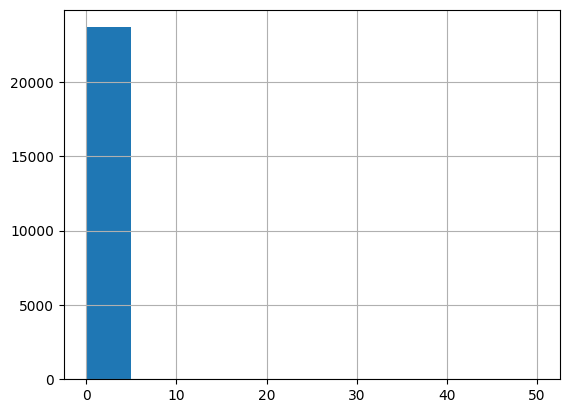

In [25]:
# Построим гистограмму, чтобы увидеть, какие данные встречаются реже всего, чтобы потом отсечь их
data['ceiling_height'].hist(range=(0, 50))

In [26]:
# Визуально взглянем на таблицу, отсортированную по убыванию по столбцу ceiling_height, возможно удастся увидеть какую-то явную ошибку в данных.
data.sort_values(by='ceiling_height', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,False,False,11.0,5,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
3148,14,2900000,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,False,False,8.0,0,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22336,19,9999000,92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,False,False,16.5,4,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
21377,19,4900000,42.0,2017-04-18T00:00:00,1,27.5,24.0,37.7,19,False,False,False,11.0,2,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
4876,7,3000000,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,False,True,NaN,2,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
17857,1,3900000,56.0,2017-12-22T00:00:00,3,27.0,5.0,33.0,4,False,False,False,NaN,0,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
5246,0,2500000,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,False,False,9.0,2,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
20478,11,8000000,45.0,2017-07-18T00:00:00,1,27.0,4.0,22.0,2,NaN,False,False,10.0,1,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
22938,14,4000000,98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,False,False,9.0,1,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0
5807,17,8150000,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,False,False,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0


In [27]:
# Проверим, какие уникальные значения есть в столбце ceiling_height
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [28]:
# Очевидно, что при заполнении данного столбца допустили ошибки из-за ручного ввода, исправим их:
data.loc[data['ceiling_height'] <=1.3, 'ceiling_height'] = data.loc[data['ceiling_height'] <=1.3, 'ceiling_height'] * 10
data.loc[data['ceiling_height'] >=20.0, 'ceiling_height'] = data.loc[data['ceiling_height'] >=20.0, 'ceiling_height'] / 10

In [29]:
# Проверим, что замены прошли корректно
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
       12.  ,  8.3 ,

<AxesSubplot:>

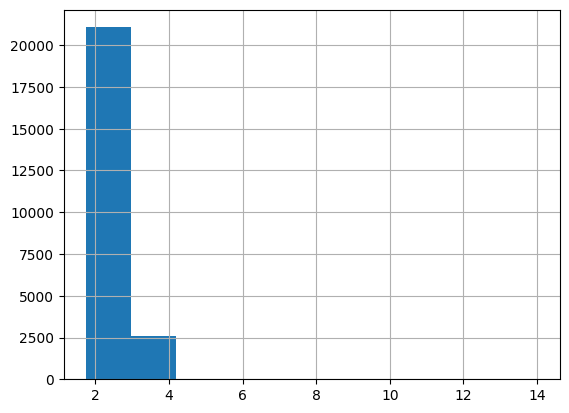

In [30]:
# Еще раз построим гистограмму
data['ceiling_height'].hist()

In [31]:
# Посчитаем для столбца ceiling_height границы значений, после которых начинаются выбросы
q75_ceiling_height, q25_ceiling_height = data['ceiling_height'].quantile([0.75, 0.25])
iqr_ceiling_height = q75_ceiling_height - q25_ceiling_height
lower_range_ceiling_height = q25_ceiling_height - 1.5 * iqr_ceiling_height
upper_range_ceiling_height = q75_ceiling_height + 1.5 * iqr_ceiling_height

print(iqr_ceiling_height)
print(lower_range_ceiling_height)
print(upper_range_ceiling_height)

0.10000000000000009
2.45
2.8500000000000005


**В этом столбце мы сначали попробовали исправить очевидно неверные значения. После того, как ошибки были исправлены и посчитаны границы, после которых начинаются выбросы, можем удалить значения ceiling_height > 3.0 , так как они являются аномальными.**

In [32]:
# Проверим, что при удалении выбивающихся значений, мы не потеряем большую часть датафрейма.
anomalii = len(data[data['ceiling_height'] > 3.0]) * 100 / len(data)
print(round(anomalii, 2))

6.38


**Видно, что мы удаляем слишком большую часть данных, поэтому принимаем решение, что будем удалять данные с ceiling_height > 3.5.**

#### Разбираемся со столбцом rooms

<AxesSubplot:>

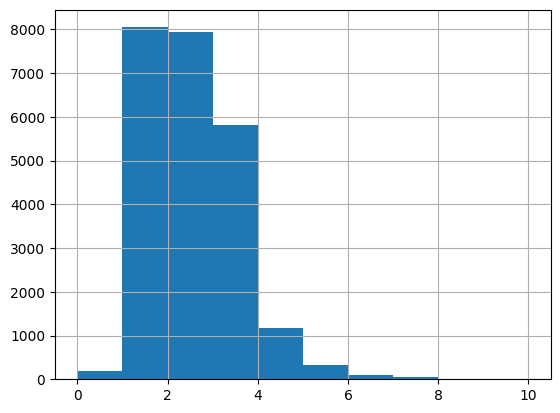

In [33]:
# Построим гистограмму, чтобы увидеть, какие данные встречаются реже всего, чтобы потом отсечь их
data['rooms'].hist(range=(0, 10))

**По гистограмме видно, что значения большее 6 в столбце практически не встречаются.**

In [34]:
# Посчитаем для столбца total_area границы значений, после которых начинаются выбросы
q75_rooms, q25_rooms = data['rooms'].quantile([0.75, 0.25])
iqr_rooms = q75_rooms - q25_rooms
lower_range_rooms = q25_rooms - 1.5 * iqr_rooms
upper_range_rooms = q75_rooms + 1.5 * iqr_rooms

print(iqr_rooms)
print(lower_range_rooms)
print(upper_range_rooms)

2.0
-2.0
6.0


In [35]:
# Визуально взглянем на таблицу, отсортированную по убыванию по столбцу rooms, возможно удастся увидеть какую-то явную ошибку в данных.
data.sort_values(by='rooms', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000,374.6,2018-06-09T00:00:00,19,2.65,5.0,264.5,2,NaN,False,False,27.6,0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18848,6,28500000,270.0,2015-03-02T00:00:00,16,3.00,4.0,180.0,4,NaN,False,False,13.0,1,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
5358,20,65000000,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
20829,6,28659000,245.4,2016-03-31T00:00:00,14,2.65,4.0,168.3,2,NaN,False,False,25.9,0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0
866,5,25000000,363.0,2017-12-23T00:00:00,14,3.16,5.0,222.0,4,NaN,False,False,16.6,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
19540,8,420000000,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
9688,8,33000000,194.1,2017-02-07T00:00:00,11,3.43,5.0,129.0,2,NaN,False,False,11.9,0,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
648,3,17500000,183.7,2018-07-01T00:00:00,11,3.40,7.0,138.8,7,NaN,False,False,13.3,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
18119,4,15500000,216.1,2016-07-04T00:00:00,10,3.15,5.0,161.4,2,NaN,False,False,19.8,0,Санкт-Петербург,24353.0,4921.0,1.0,368.0,0.0,NaN,11.0
4149,6,23000000,272.6,2018-01-11T00:00:00,10,3.14,7.0,145.9,7,NaN,False,False,18.8,1,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN


**Насколько видим часть квартир являются не обычными квартирами жилого фонда, а премиум недвижимостью с большими площадями, стоимостью, количеством комнат.
Чтобы эти данные не влияли на наше исследование, удалим данные с rooms > 7.**

In [36]:
# Проверим, что при удалении выбивающихся значений, мы не потеряем большую часть датафрейма.
anomalii = len(data[data['rooms'] > 7]) * 100 / len(data)
print(round(anomalii, 2))

0.13


#### Разбираемся со столбцом last_price

In [37]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

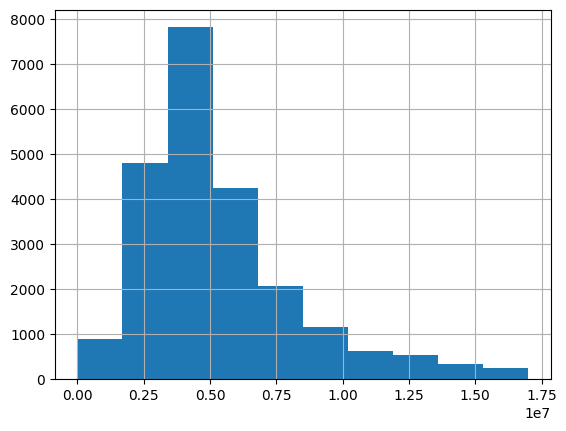

In [38]:
# Построим гистограмму, чтобы увидеть, какие данные встречаются реже всего, чтобы потом отсечь их
data['last_price'].hist(range=( 0, 17000000))

**По гистограммам видно, что значения большее 17 000 000 почти не встречаются.**

In [39]:
# Посчитаем для столбца last_price границы значений, после которых начинаются выбросы
q75_last_price, q25_last_price = data['last_price'].quantile([0.75, 0.25])
iqr_last_price = q75_last_price - q25_last_price
lower_range_last_price = q25_last_price - 1.5 * iqr_last_price
upper_range_last_price = q75_last_price + 1.5 * iqr_last_price

print(iqr_last_price)
print(lower_range_last_price)
print(upper_range_last_price)

3400000.0
-1700000.0
11900000.0


In [40]:
# Проверим, какие квартиры дороже 12 000 000, возможно удастся увидеть какую-то явную ошибку в данных, которую можно исправить.
# Логично, что сюда попадает жилье премиум класса
data[data['last_price'] > 12000000].head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
3,0,64900000,159.0,2015-07-24T00:00:00,3,2.65,14.0,95.00,9,NaN,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
19,16,14200000,121.0,2019-01-09T00:00:00,3,2.75,16.0,76.00,8,NaN,False,False,12.00,0,Санкт-Петербург,38900.0,12843.0,0.0,NaN,0.0,NaN,97.0
35,6,15500000,149.0,2017-06-26T00:00:00,5,2.65,5.0,104.00,4,NaN,False,False,17.00,0,Санкт-Петербург,23670.0,3502.0,0.0,NaN,1.0,779.0,644.0
42,13,22000000,161.8,2015-07-08T00:00:00,4,2.80,4.0,80.90,2,False,False,False,17.60,5,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
51,7,45000000,161.0,2017-10-17T00:00:00,3,3.20,8.0,38.00,4,NaN,False,False,50.00,0,Санкт-Петербург,32537.0,6589.0,0.0,NaN,3.0,99.0,541.0
63,2,20000000,118.0,2018-09-11T00:00:00,3,3.00,9.0,68.00,7,NaN,False,False,16.00,0,Санкт-Петербург,26055.0,4800.0,1.0,648.0,1.0,779.0,37.0
121,20,33000000,180.0,2017-02-17T00:00:00,3,2.90,9.0,86.00,8,False,False,False,24.00,4,Санкт-Петербург,25689.0,4264.0,1.0,633.0,0.0,NaN,144.0
124,20,12490000,87.8,2019-03-10T00:00:00,3,2.65,12.0,45.10,3,NaN,False,False,24.00,1,Санкт-Петербург,32746.0,13845.0,0.0,NaN,1.0,516.0,NaN
137,11,13310800,85.1,2018-01-01T00:00:00,2,2.70,10.0,31.52,5,NaN,False,False,26.85,1,Санкт-Петербург,31460.0,4263.0,1.0,141.0,3.0,133.0,340.0


**Мы видим, что значения больше 12 000 000 - это недвижимость премиум класса, выявленная ранее.
Чтобы эти данные не влияли на наше исследование и так как мы не знаем, как их исправить, удалим данные с last_price > 12 000 000.**

In [41]:
# Проверим, что при удалении выбивающихся значений, мы не потеряем большую часть датафрейма.
anomalii = len(data[(data['last_price'] > 12000000)]) * 100 / len(data)
print(round(anomalii, 2))

8.19


**Видно, что мы удаляем слишком большую часть данных, поэтому принимаем решение, что будем удалять данные с last_price > 15 000 000.**

In [42]:
# Удалим все аномальные значения
data_new = data.query('total_area < 115 and last_price < 15000000 and rooms < 7 and ceiling_height < 3.5')

In [43]:
# Оценим , какое количество строк по удалили
data_new.shape[0] / data.shape[0]

0.92151567576691

**Мы удалили порядка 8% датафрейма**

In [44]:
# Проверим, что удаление прошло корректно
data_new[data_new['ceiling_height'] > 3.5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [45]:
data_new[data_new['last_price'] > 15000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### Вывод:
В ходе предобработки данных мы попытались убрать неявные дубликаты, а также исправить или удалить аномальные значения.
Также в ходе предобработки данных мы обнаружили, что в таблице присутствуют данные не только по обычной недвижимости, но и недвижимости премиум класса с высокими площадями и ценой.
Так как этих данных было немного по сравнению с общим числом, то мы удалили их, чтобы они не влияли на наше исследование.

В ходе предобработки данных мы удалили 8% датафрейма.

### Посчитаем и добавим в таблицу новые столбцы

In [46]:
# Добавим в таблицу стоимость квадратного метра
data_new['1metre_price'] = data_new['last_price'] / data_new['total_area']

In [47]:
# Переведем столбец first_day_exposition в формат даты и времени
data_new['first_day_exposition'] = pd.to_datetime(data_new['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [48]:
# Добавим столбец с днем недели публикации объявления
data_new['weekday_publication'] = data_new['first_day_exposition'].dt.weekday

In [49]:
# Добавим столбец с годом публикации объявления
data_new['year_publication'] = pd.DatetimeIndex(data_new['first_day_exposition']).year

In [50]:
# Добавим столбец с месяцем публикации объявления
data_new['month_publication'] = pd.DatetimeIndex(data_new['first_day_exposition']).month

In [51]:
# Проверим, что столбцы создались
data_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1metre_price,weekday_publication,year_publication,month_publication
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,2019,3
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,2018,12
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,2015,8
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,2018,6
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,NaN,False,False,9.1,0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,2018,9


In [52]:
# Добавим тип этажа квартиры. Сначала напишем вспомогательную функцию.
def function_help(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [53]:
# Добавим столбец с типом этажа
data_new['type_floor'] = data_new.apply(function_help, axis=1)

In [54]:
# Проверим, что столбец создался
data_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1metre_price,weekday_publication,year_publication,month_publication,type_floor
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,2019,3,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,2018,12,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,2015,8,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,2018,6,другой
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,NaN,False,False,9.1,0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,2018,9,другой


In [55]:
# Добавим в таблицу столбец с расстоянием до центра в километрах
data_new['distance_to-central'] = round((data_new['cityCenters_nearest'] / 1000), 0)

In [56]:
# Проверим, что столбец создался
data_new.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1metre_price,weekday_publication,year_publication,month_publication,type_floor,distance_to-central
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,2019,3,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,2018,12,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,2015,8,другой,14.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,2018,6,другой,8.0
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,NaN,False,False,9.1,0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,0,2018,9,другой,NaN


### Проведем исследовательский анализ данных

#### Изучим следующие параметры объектов:
общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
этаж квартиры;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего аэропорта;
расстояние до ближайшего парка;
день и месяц публикации объявления.

Для каждого параметра построим гистограмму.

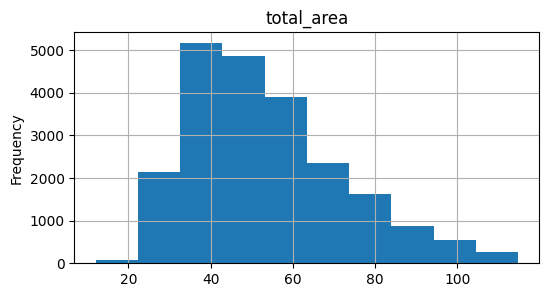

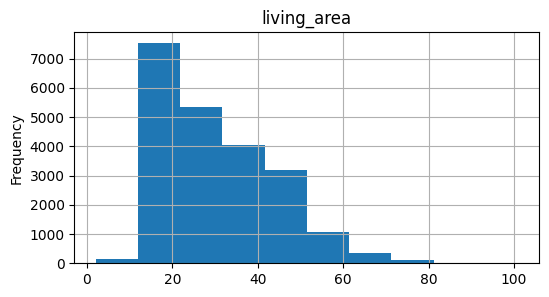

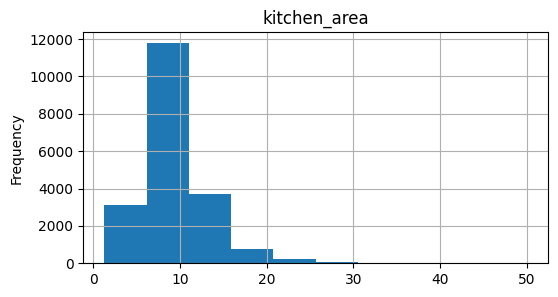

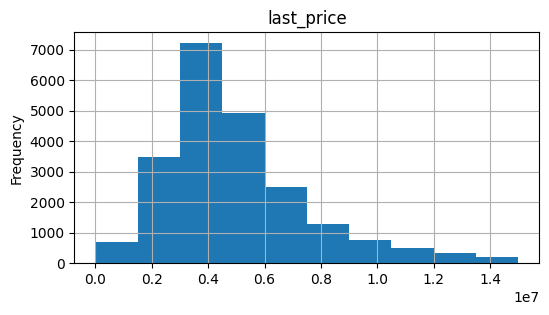

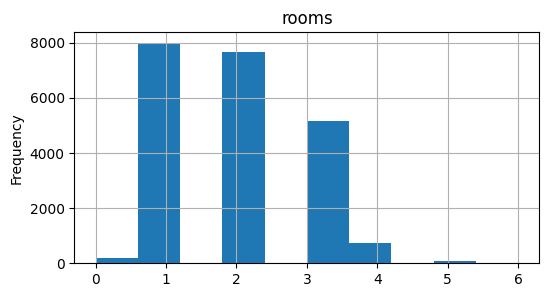

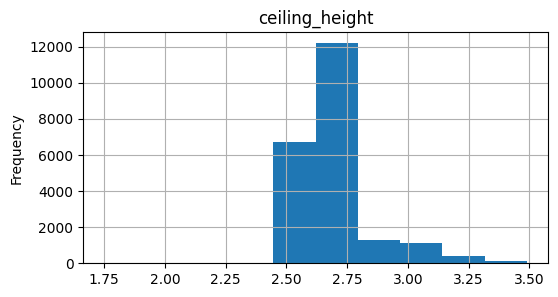

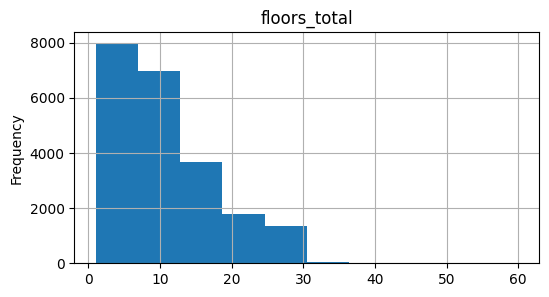

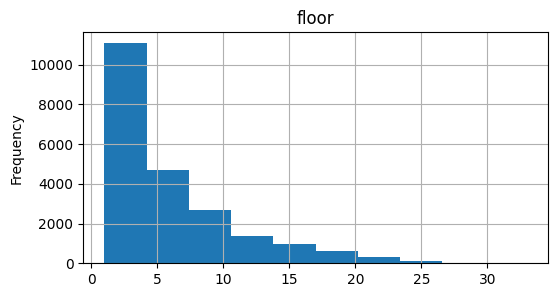

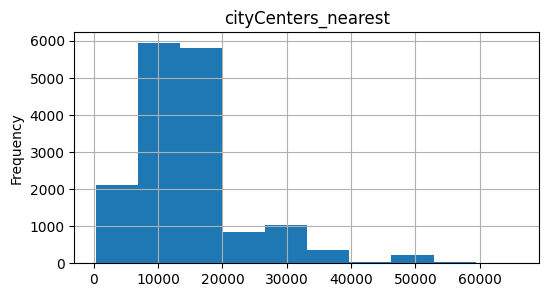

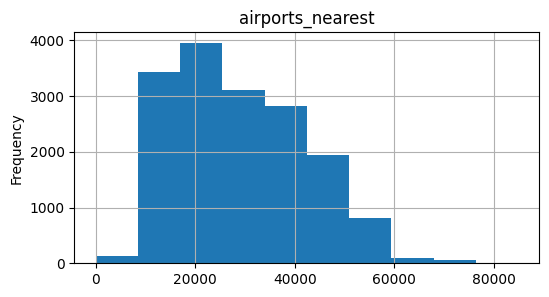

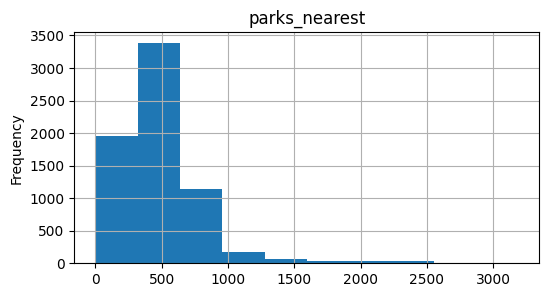

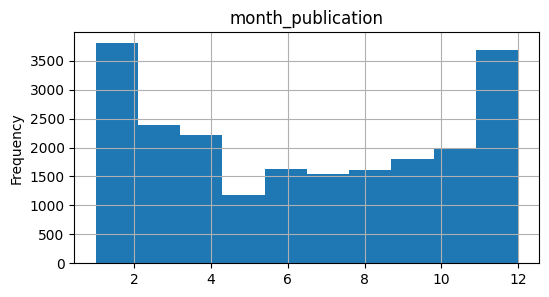

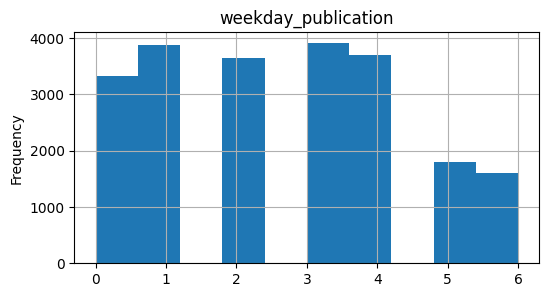

In [57]:
# Создадим список с интересующими нас столбцами и для каждого столбца построим гистограмму
list = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floors_total', 'floor', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'month_publication', 'weekday_publication'] 
for col in list:
    data_new[col].plot(kind='hist', title=col, grid=True, figsize=(6, 3))
    plt.show()

<AxesSubplot:>

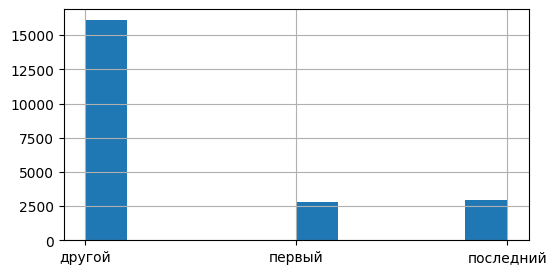

In [58]:
# Построим гистограмму для столбца type_floor
data_new['type_floor'].hist(grid=True, figsize=(6, 3))

#### Вывод по гистограммам:
В нашей таблице преобладают квартиры с общей площадью примерно от 36 до 42 квадратных метров. Полагаю, что это однокомнатные и маленькие двухкомнатные квартиры.
Есть большое количество с общей площадью от 42 до 56 квадратных метров и от 56 до 62 квадратных метров. Полагаю что это двухкомнатные квартиры в зависимости от типа дома - старое жилье или новостройка.
Также часто встречаются квартиры с общей площадью от 22 до 36 (студии и однокомнатные квартиры) и от 62 до 82 квадратных метров (трехкомнатные квартиры).
Квартиры с общей площадью более 82 квадратных метров встречаются редко.
Квартиры с общей площадью до 22 квадратных метров практически не встречаются.

В нашей таблице преобладают квартиры с жилой площадью примерно от 16 до 21 квадратных метров.
Есть большое количество с жилой площадью от 21 до 36 квадратных метров и от 36 до 46 квадратных метров.
Также встречаются квартиры с жилой площадью от 46 до 61 квадратных метров.
Квартиры с жилой площадью до 16 квадратных метров и более 61 квадратного метра практически не встречаются.

Практически у всех квартир площадь кухни разнится от 6 до 11 квадратных метров. Предполагаю, что это связано с типом дома (старый фонд, новостройка).
Есть кухни с площадью от 11 до 17 квадратных метров. 
Также встречаются кухни с площадью менее 6 квадратных метров. Предполагаю, что это размер кухонь, рассчитанных для квартир-студий , где кухня и жилое помещение совмещены..
Кухни с площадью более 17 квадратных метров встречаются достаточно редко.

Наиболее популярные цены на квартиры варьируются от 3 000 000 до 4 200 000 рублей.
Также много квартир с ценой от 4 200 000 до 6 000 000 рублей.
Есть много квартир от 6 000 000 до 7 800 000 рублей.
Реже встречаются квартиры от 7 800 000 и 8 500 000 рублей и от 8 500 000 до 12 000 000 рублей.
Квартиры дороже 12 000 000 рублей практически не встречаются.
Также есть небольшая группа помещений с ценой меньше 1 800 000 рублей. Полагаю, что это квартиры, расположенные в области и рядом с Санкт-Петербургом (Мурино, Кудрово).

Большинство квартир в таблице - однокомнатные либо двухкомнатные.
Также большое число трехкомнатных квартир.

Наиболее часто встречаемые высоты потолков варьируются от 2.6 до 2.77 метров.
Есть много квартир с высотой потолка от 2.48 до 2.6 метров.
Также есть небольшая группа помещений с высотой потолка от 2.77 до 3.12 метров.
Квартиры с высотой потолка больше 3.12 метров практически не встречаются.

Большинство квартир расположено с 1 по 4 этаж, либо с 4 по 6. Это подозрительно, возможно при удаленни значений мы удалили много квартир , находящихся на высоких этажах.

Больлинство квартир расположено в пределах от 8 000 до 20 000 метров до центра. Предполгаю, что это указывает на то, что большинство квартир находятся в Санкт-Петербурге, Мурино, Кудрово.

Объявления по продаже квартир публиковались ежемесячно, что логично. Пик публикаций объявлений приходится на начало и конец года.

Квартир на первом и последнем этажах достаточно мало.

#### Изучим, как быстро продавались квартиры:  
Построим гистограмму.
Посчитаем среднее и медиану.

<AxesSubplot:>

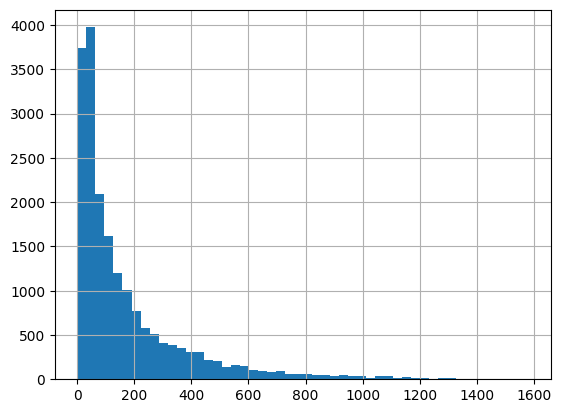

In [59]:
# Построим гистограмму
data_new['days_exposition'].hist(grid=True, bins=50)

In [60]:
# Посчитаем среднее
round(data_new['days_exposition'].mean(), 0)

174.0

In [61]:
# Посчитаем медиану
round(data_new['days_exposition'].median(), 0)

92.0

<AxesSubplot:>

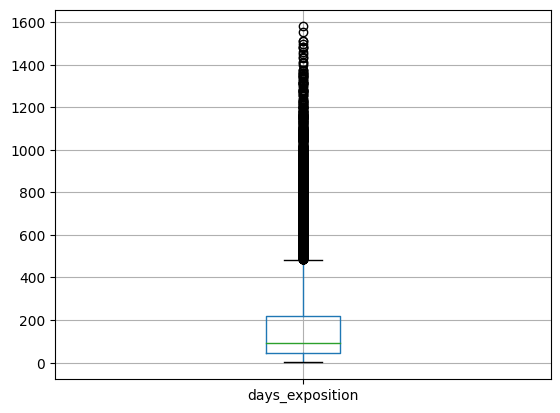

In [62]:
# Дополнительно построим диаграмму размаха данных
data_new.boxplot(column=['days_exposition'], grid= True)

In [63]:
data_new['days_exposition'].describe()

count    19133.000000
mean       173.621439
std        211.860294
min          1.000000
25%         44.000000
50%         92.000000
75%        220.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [64]:
# Посчитаем для столбца days_exposition границы значений, после которых начинаются выбросы
q75_days_exposition, q25_days_exposition = data_new['days_exposition'].quantile([0.75, 0.25])
iqr_days_exposition = q75_days_exposition - q25_days_exposition
lower_range_days_exposition = q25_days_exposition - 1.5 * iqr_days_exposition
upper_range_days_exposition = q75_days_exposition + 1.5 * iqr_days_exposition

print(iqr_days_exposition)
print(lower_range_days_exposition)
print(upper_range_days_exposition)

176.0
-220.0
484.0


#### Вывод:
На мой взгляд необычно долгими являются продажи, находящиеся за верхней границей, то есть более 485 дней.
Просто долгие продажи это на мой взгляд значения, находящиеся за 3 квартилем, т.е более 220 дней.
На мой взгляд бытрые продажи это значения находящиеся ниже 1 квартиля, т.е менее 44 дней.

#### Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта.
Проверим, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).

#### Проверим зависит ли цена от общей площади

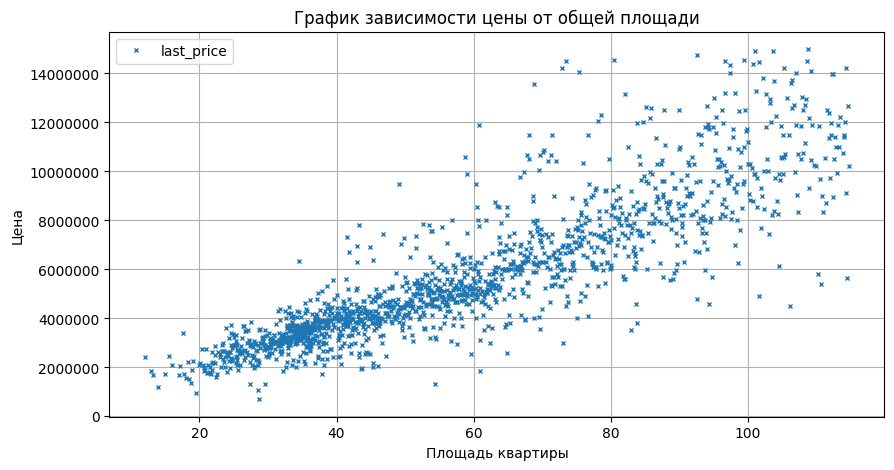

In [103]:
data_new.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(y='last_price', style='x', ms=3, 
                                                                                grid=True, figsize=(10, 5), 
                                                                                title='График зависимости цены от общей площади')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.xlabel("Площадь квартиры")
plt.ylabel("Цена")
plt.show()

In [67]:
# Дополнительно посчитаем коэффициент корреляции
print(data_new['last_price'].corr(data_new['total_area']))

0.7233617845854399


**Вывод: по графику видно, что есть зависимость цены квартиры от жилой площади: с увеличением жилой площади цена квартиры растет.
Коэффициент корреляции также показывает, что есть связь между данными параметрами.**

#### Проверим зависит ли цена от жилой площади

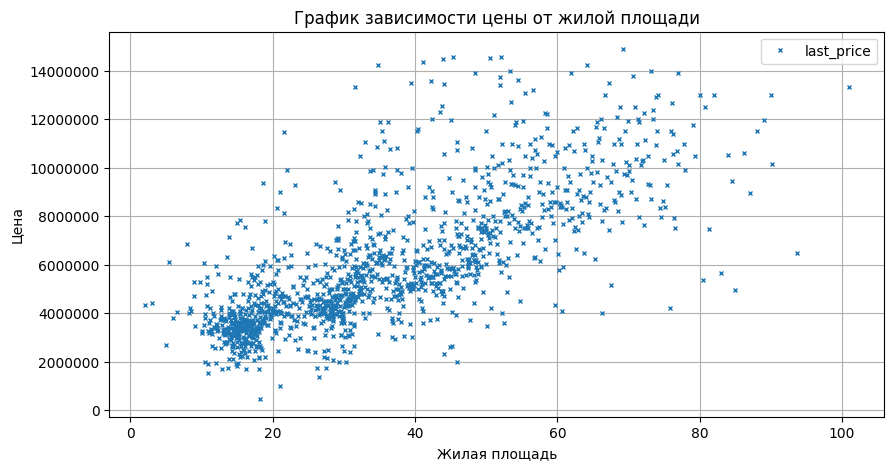

In [105]:
data_new.pivot_table(index='living_area', values='last_price', aggfunc='median').plot(y='last_price', style='x', ms=3, 
                                                                                grid=True, figsize=(10, 5), 
                                                                                title='График зависимости цены от жилой площади')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.xlabel("Жилая площадь")
plt.ylabel("Цена")
plt.show()

In [69]:
# Дополнительно посчитаем коэффициент корреляции
print(data_new['last_price'].corr(data_new['living_area']))

0.592121355364806


**Вывод: по графику нельзя сказать, что есть прямая зависимость цены квартиры от жилой площади.
Возможно это связано с тем, что часть квартир расположено в области, где цена значительно ниже чем в Санкт-Петербурге.
Коэффициент корреляции также показывает, что связь между данными параметрами есть, но не прямая.**

#### Проверим зависит ли цена от площади кухни

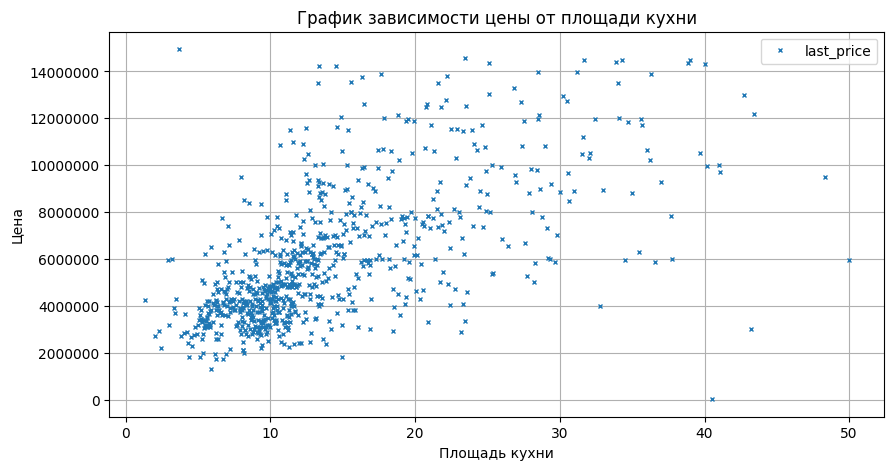

In [106]:
data_new.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').plot(y='last_price', 
                                                                                style='x', ms=3, grid=True, 
                                                                                figsize=(10, 5), 
                                                                                title='График зависимости цены от площади кухни')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.xlabel("Площадь кухни")
plt.ylabel("Цена")
plt.show()

In [71]:
# Дополнительно посчитаем коэффициент корреляции
print(data_new['last_price'].corr(data_new['kitchen_area']))

0.5151008737629871


**Вывод: по графику и коэффициенту корреляции нельзя сказать, что есть прямая зависимость цены квартиры от площади кухни.
Возможно это связано с тем, что часть квартир расположено в области, т.е квартира может иметь большую кухню, но из-за своего расположения может стоить значительно меньше чем квартира в Санкт-Петербурге даже с маленькой кухней.**

#### Проверим зависит ли цена от количества комнат

In [72]:
# Создадим сводную таблицу, сгруппированную по количеству комнат и цене
data_pivot_rooms = data_new.pivot_table(index='rooms', values='last_price', aggfunc=['mean', 'median', 'count'])

In [73]:
data_pivot_rooms

,mean,median,count
,last_price,last_price,last_price
rooms,,,
0,2.900734e+06,2700000,193
1,3.769179e+06,3600000,7980
2,5.148860e+06,4700000,7680
3,6.402479e+06,5850000,5171
4,7.164902e+06,6990000,741
5,7.741343e+06,7650000,67
6,1.125786e+07,12000000,7


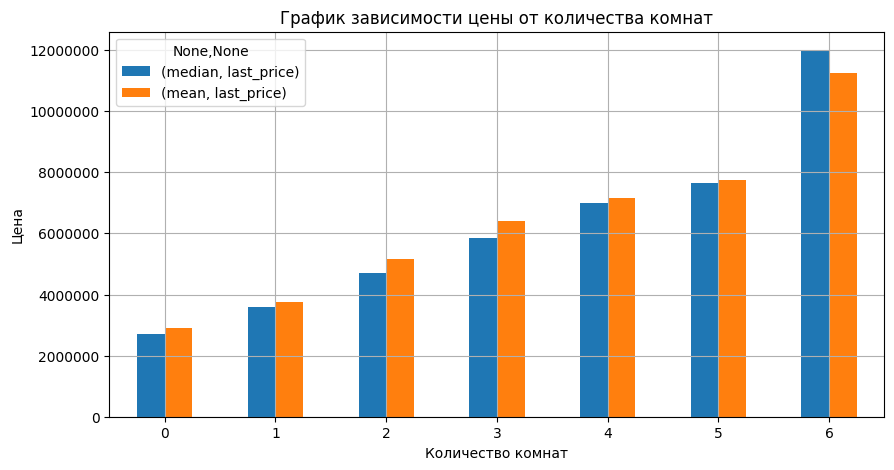

In [108]:
# Построим столбчатую диаграмму, чтобы визуально изучить полученные данные
data_new.pivot_table(index='rooms', values='last_price', aggfunc=['median', 'mean']).plot(
    grid=True, figsize=(10, 5), kind='bar', title='График зависимости цены от количества комнат')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.xlabel("Количество комнат")
plt.ylabel("Цена")
plt.xticks(rotation='0')
plt.show()

In [75]:
# Дополнительно посчитаем коэффициент корреляции
print(data_new['last_price'].corr(data_new['rooms']))

0.44238795492393435


**Вывод: по графику видно, что есть связь между количеством комнат и ценой.
С увеличением числа комнат в квартире, цена растет (мы можем утверждать об этом для квартир с 1-4 комнатами).
Данные по квартирам с 5 и 6 комнатами нельзя считать показательными, так как они крайне мало представлены в выборке.
При этом коэффициент корреляциипоказывает, что между данными параметрами практически нет связи.**

#### Проверим зависит ли цена от типом этажа

In [76]:
# Создадим сводную таблицу, сгруппированную по цене и типу этажа
data_pivot_type_floor_2 = data_new.pivot_table(index='type_floor', values='last_price', aggfunc=['mean', 'median', 'count'])

In [77]:
data_pivot_type_floor_2

,mean,median,count
,last_price,last_price,last_price
type_floor,,,
другой,5.222987e+06,4600000,16086
первый,4.152233e+06,3800000,2772
последний,4.585059e+06,4006000,2981


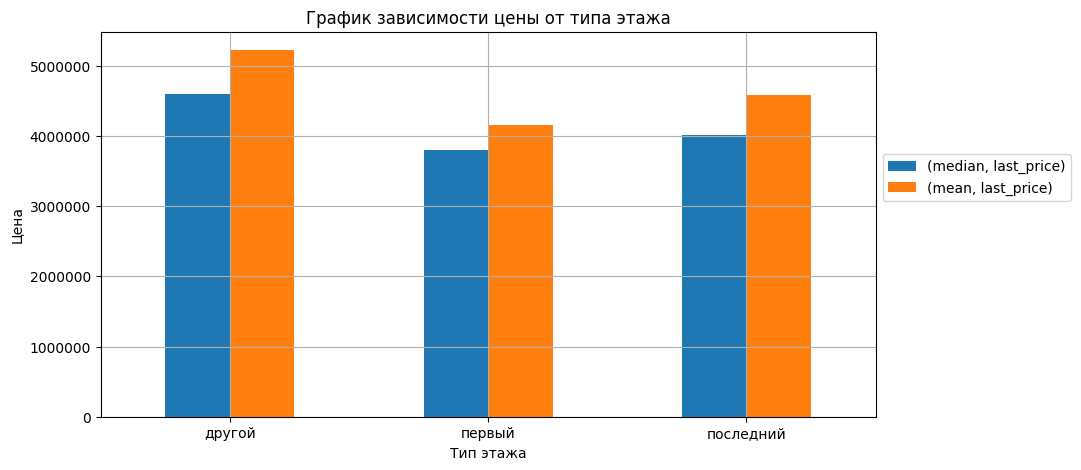

In [110]:
# Построим столбчатую диаграмму, чтобы визуально изучить полученные данные
data_new.pivot_table(index='type_floor', values='last_price', aggfunc=['median', 'mean']).plot(
    grid=True, figsize=(10, 5), kind='bar', title='График зависимости цены от типа этажа')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.xlabel("Тип этажа")
plt.ylabel("Цена")
plt.xticks(rotation='0')
plt.legend(bbox_to_anchor=(1, 0.7))
plt.show()

**Вывод: по графику и сводной таблице видно, что действительно существует связь между ценой и типом этажа.
Первый и последний этажи уступают в цене типу этажа "другой".**

#### Проверим зависит ли цена от дня публикации

In [79]:
# Создадим сводную таблицу, сгруппированную по цене и дню публикации
data_pivot_weekday_publication = data_new.pivot_table(index='weekday_publication', values='last_price', aggfunc=['mean', 'median', 'count'])

In [80]:
data_pivot_weekday_publication

,mean,median,count
,last_price,last_price,last_price
weekday_publication,,,
0,4.989910e+06,4450000,3328
1,5.067192e+06,4500000,3870
2,5.014242e+06,4500000,3636
3,5.020650e+06,4400000,3906
4,4.975452e+06,4400000,3705
5,4.889472e+06,4400000,1800
6,4.956728e+06,4445000,1594


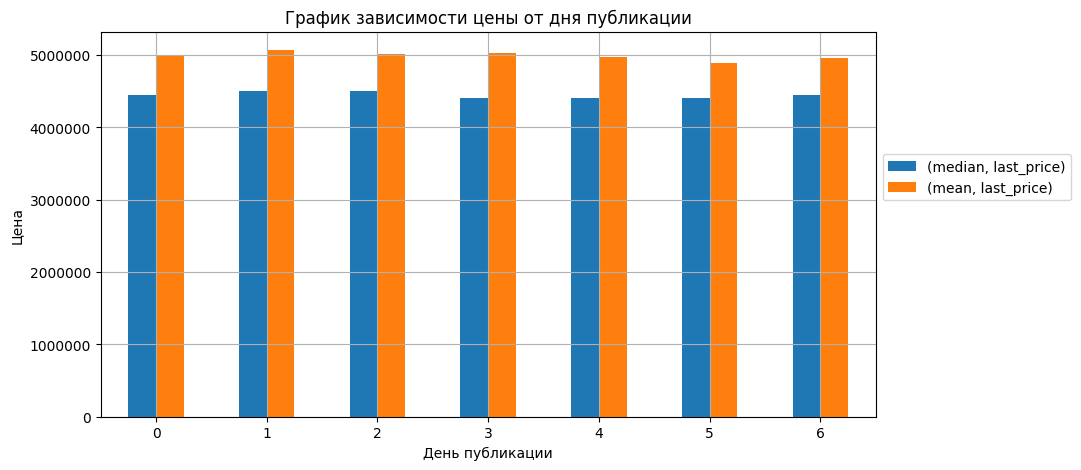

In [112]:
# Построим столбчатую диаграмму, чтобы визуально изучить полученные данные
data_new.pivot_table(index='weekday_publication', values='last_price', aggfunc=['median', 'mean']).plot(
    grid=True, figsize=(10, 5), kind='bar', title='График зависимости цены от дня публикации')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.xlabel("День публикации")
plt.ylabel("Цена")
plt.xticks(rotation='0')
plt.legend(bbox_to_anchor=(1, 0.7))
plt.show()

**Вывод: по графику и сводной таблице видно, что цена мало меняется от дня публикации объявления.**

#### Проверим зависит ли цена от месяца публикации

In [82]:
# Создадим сводную таблицу, сгруппированную по цене и месяцу публикации
data_pivot_month_publication = data_new.pivot_table(index='month_publication', values='last_price', aggfunc=['mean', 'median', 'count'])

In [83]:
data_pivot_month_publication

,mean,median,count
,last_price,last_price,last_price
month_publication,,,
1,4.976269e+06,4490000,1377
2,4.968876e+06,4430000,2425
3,4.978578e+06,4500000,2389
4,5.125500e+06,4600000,2209
5,4.984389e+06,4400000,1176
6,4.815106e+06,4200000,1629
7,4.973114e+06,4399500,1544
8,5.022194e+06,4400000,1616


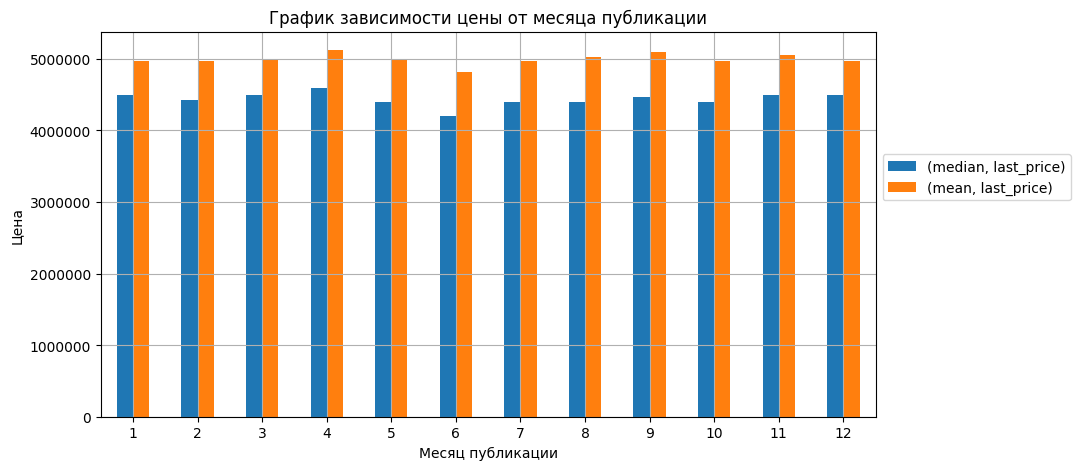

In [113]:
# Построим столбчатую диаграмму, чтобы визуально изучить полученные данные
data_new.pivot_table(index='month_publication', values='last_price', aggfunc=['median', 'mean']).plot(
    grid=True, figsize=(10, 5), kind='bar', title='График зависимости цены от месяца публикации')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.xlabel("Месяц публикации")
plt.ylabel("Цена")
plt.xticks(rotation='0')
plt.legend(bbox_to_anchor=(1, 0.7))
plt.show()

**Вывод: по графику и сводной таблице видно, что цена меняется в зависимости от месяца публикации:
наблюдается рост цены в апреле, а затем снижение в мае и июне, далее с июля идет постепенный рост цены.
Тем не менее, резких скачков цены в зависимости от месяца не наблюдается.**

#### Проверим зависит ли цена от года публикации

In [85]:
# Создадим сводную таблицу, сгруппированную по цене и году публикации
data_pivot_year_publication = data_new.pivot_table(index='year_publication', values='last_price', aggfunc=['mean', 'median', 'count'])

In [86]:
data_pivot_year_publication

,mean,median,count
,last_price,last_price,last_price
year_publication,,,
2014,6.629768e+06,5920000,98
2015,5.431177e+06,4925000,1026
2016,4.931066e+06,4300000,2523
2017,4.907517e+06,4300000,7545
2018,4.924375e+06,4400000,7983
2019,5.327827e+06,4899500,2664


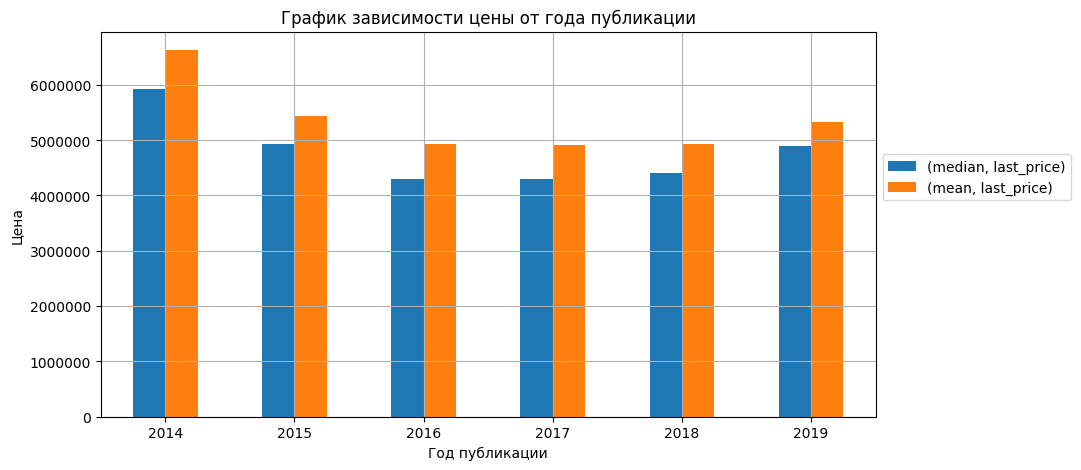

In [114]:
# Построим столбчатую диаграмму, чтобы визуально изучить полученные данные
data_new.pivot_table(index='year_publication', values='last_price', aggfunc=['median', 'mean']).plot(
    grid=True, figsize=(10, 5), kind='bar', title='График зависимости цены от года публикации')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.xlabel("Год публикации")
plt.ylabel("Цена")
plt.xticks(rotation='0')
plt.legend(bbox_to_anchor=(1, 0.7))
plt.show()

**Вывод: по графику и сводной таблице видно, что цена меняется в зависимости от года публикации:
после 2015 года наблюдается снижение цены особенно в 2016, 2017, 2018 годах. В 2019 году цена вырастает и практически сравнивается с 2015 годом.
Пиковое значение в 2014 году на мой взгляд нельзя учитывать из-за нехватки данных по этому году.**

#### Посчитаем среднюю цену квадратного метра в 10 населенных пунктах с наибольшим числом объявлений.

In [88]:
# Создадим сводную таблицу, сгруппированную по населенному пункту и средней цене за квадратный метр
data_metre = data_new.pivot_table(index='locality_name', values=['1metre_price', 'floor'], aggfunc={'1metre_price': 'mean', 'floor' : 'count'})

In [89]:
# Проверим, что таблица создалась
data_metre.head()

,1metre_price,floor
locality_name,,
Бокситогорск,17457.330124,15
Волосово,40183.325974,36
Волхов,35087.679877,111
Всеволожск,67099.659730,391
Выборг,57951.307506,220


In [90]:
# Переименуем столбцы таблицы в более понятные
data_metre.columns = ['1metre_average_price', 'Number of ads']

In [91]:
# Получим данные по 10 населенным пунктам с наибольшим числом объявлений.
data_metre.sort_values(by='Number of ads', ascending=False).head(10)

,1metre_average_price,Number of ads
locality_name,,
Санкт-Петербург,107308.652286,14008
Мурино,86087.512050,590
Кудрово,95290.604958,471
поселок Шушары,78682.540681,436
Всеволожск,67099.659730,391
Пушкин,101086.906871,336
Колпино,75370.025473,336
поселок Парголово,90332.263023,326
Гатчина,68974.051834,303


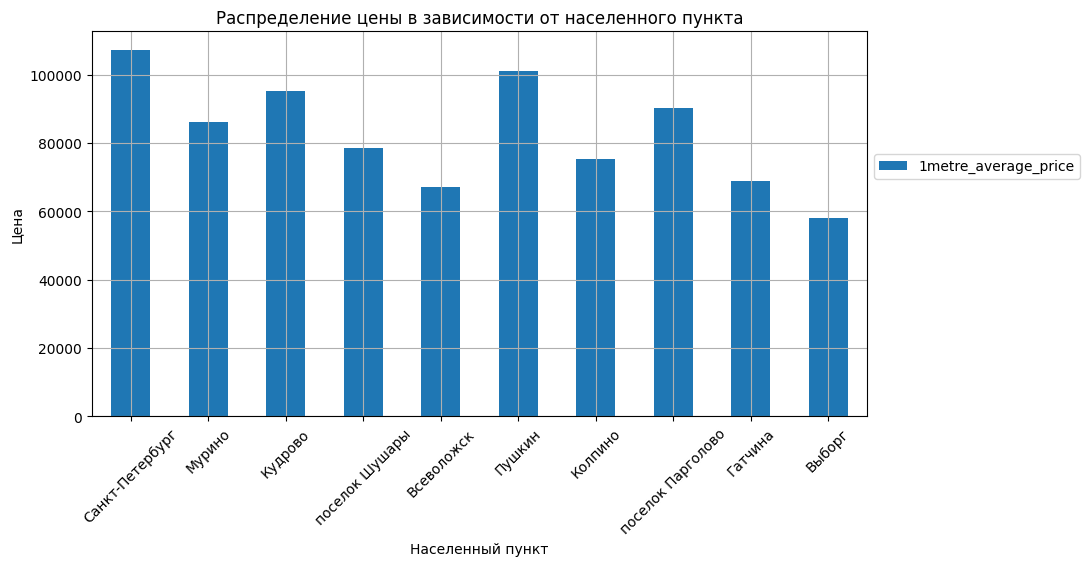

In [117]:
# Для наглядности построим столбчатую диаграмму
data_metre.sort_values(by='Number of ads', ascending=False).head(10).plot(
    y='1metre_average_price', grid=True, figsize=(10, 5), kind='bar', 
    title='Распределение цены в зависимости от населенного пункта')
plt.ticklabel_format(useOffset=False,style='plain', axis='y')
plt.xlabel("Населенный пункт")
plt.ylabel("Цена")
plt.xticks(rotation='45')
plt.legend(bbox_to_anchor=(1, 0.7))
plt.show()

**Вывод: 
из 10 населенных пунктов с наибольшим числом объявлений самая высокая средняя цена квадратного метра в Санкт-Петербурге, самая низкая - в Выборге.
Санкт-Петербург - абсолютный лидер по числу объявлений, что логично.**

#### Найдем населенные пункты с самой высокой и самой низкой ценой квадратного метра.

In [93]:
# Найдем населенный пункт с самой высокой ценой за квадратный метр
data_metre[data_metre['1metre_average_price'] == data_metre['1metre_average_price'].max()]

,1metre_average_price,Number of ads
locality_name,,
Санкт-Петербург,107308.652286,14008


In [94]:
# Найдем населенный пункт с самой низкой ценой за квадратный метр
data_metre[data_metre['1metre_average_price'] == data_metre['1metre_average_price'].min()]

,1metre_average_price,Number of ads
locality_name,,
деревня Старополье,11206.221198,3


#### Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра

In [95]:
# Оставляем квартиры только в Санкт-Петербурге
data_spb = data_new.query('locality_name == "Санкт-Петербург"')

In [96]:
# Создадим сводную таблицу, сгруппированную по расстоянию до центра города и средней стоимости
data_spb_pivot = data_spb.pivot_table(index='distance_to-central', values=['1metre_price', 'floor'], aggfunc={'1metre_price': 'mean', 'floor' : 'count'})

In [97]:
data_spb_pivot

,1metre_price,floor
distance_to-central,,
0.0,106672.589765,7
1.0,124252.943644,100
2.0,123433.407905,164
3.0,112266.913436,232
4.0,121192.128115,454
5.0,125045.519623,609
6.0,126187.322233,441
7.0,119695.367476,304
8.0,118475.489986,501


In [98]:
data_spb_pivot.columns = ['1metre_average_price', 'count']

In [99]:
data_spb_pivot

,1metre_average_price,count
distance_to-central,,
0.0,106672.589765,7
1.0,124252.943644,100
2.0,123433.407905,164
3.0,112266.913436,232
4.0,121192.128115,454
5.0,125045.519623,609
6.0,126187.322233,441
7.0,119695.367476,304
8.0,118475.489986,501


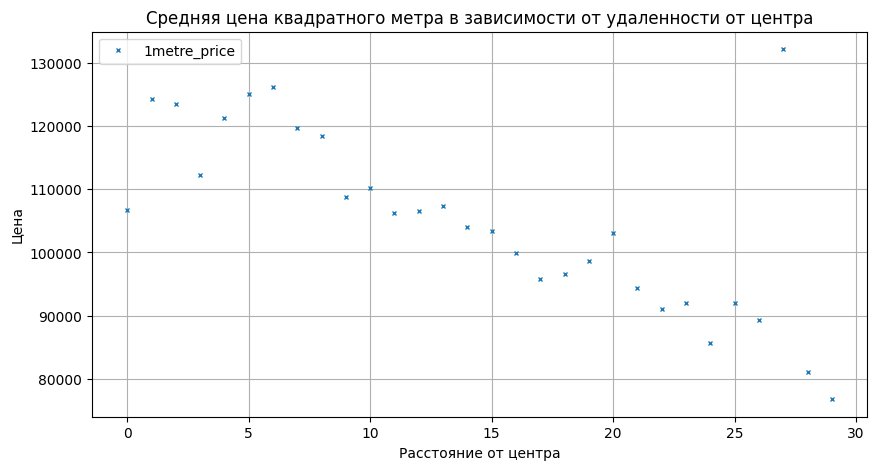

In [118]:
# Визуализируем полученные данные
data_spb.pivot_table(index='distance_to-central', values='1metre_price', aggfunc='mean').plot(
    y='1metre_price', style='x', ms=3, grid=True, figsize=(10, 5), 
    title='Средняя цена квадратного метра в зависимости от удаленности от центра')
plt.xlabel("Расстояние от центра")
plt.ylabel("Цена")
plt.xticks(rotation='0')
plt.show()

**Вывод: несмотря на наличие некоторых выбивающихся занчений, можно сказать, что с удалением от центра города средняя цена квадратного метра снижается.**

### Общий вывод
В этом проекте мы исследовали данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 
Нашей задачей было определить праметры, влияющие на стоимость квартиры. 
Проект разделен на несколько частей:
в первой части мы занимались предобработкой данных, пытались заполнить пропуски, найти и устранить аномальные значения.
Также в первой части проекта мы установили, что в исходных данных помимо обычных квартир, присутствуют также данные по премиум недвижимости. Было решено исключить эти данные из анализа, всего в ходе предобработки данных мы удалили 8% всех значений.

во второй части мы занимались исследовательским анализом: изучали различные столбцы таблицы, строили гистограммы и делали выводы на их основании. Нам удалось установить следующее:
1. В нашей таблице преобладают квартиры с общей площадью примерно от 36 до 42 квадратных метров. Полагаю, что это однокомнатные и маленькие двухкомнатные квартиры.
2. В нашей таблице преобладают квартиры с жилой площадью примерно от 16 до 21 квадратных метров.
3. Практически у всех квартир площадь кухни разнится от 6 до 11 квадратных метров. Предполагаю, что это связано с типом дома (старый фонд, новостройка).
4. Наиболее популярные цены на квартиры варьируются от 3 000 000 до 4 200 000 рублей.
5. Большинство квартир в таблице - однокомнатные либо двухкомнатные.
6. Наиболее часто встречаемые высоты потолков варьируются от 2.6 до 2.77 метров.
7. Большинство квартир расположено с 1 по 4 этаж.
8. Больлинство квартир расположено в пределах от 8 000 до 20 000 метров до центра. Предполгаю, что это указывает на то, что большинство квартир находятся в Санкт-Петербурге, Мурино, Кудрово.
9. Объявления по продаже квартир публиковались ежемесячно, что логично. Пик публикаций объявлений приходится на начало и конец года.
10. Квартир на первом и последнем этажах достаточно мало.

в третьей части проекта мы изучали как быстро продавались квартиры. Для этого мы строили гистограмму, рассчитывали среднее и медиану.
Мы пришли к выводу, что необычно долгими являются продажи более 485 дней, а быстрые - менее 44 дней.

в четвертой части проекта мы изучали какие факторы больше всего влияют на общую (полную) стоимость объекта.
Нам удалось установить следующее:
1. Цена квартиры напрямую зависит от : общей площади, количества комнат, типа этажа.
2. Нет прямой связи между ценой квартиры и : жилой площадью, площадью кухни, месяцем публикации объявления.
3. Цена квартиры никак не зависит от дня публикации объявления.
4. Цена квартиры менялась в зависимости от года. Очевидно, в разные года была разная ситуация на рынке недвижимости.

в пятой части проекта мы считали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
Нам удалось установить следующее:
1. Самая высокая средняя цена квадратного метра в 10 населённых пунктах с наибольшим числом объявлений в Санкт-Петербурге, 
2. самая низкая средняя цена квадратного метра в 10 населённых пунктах с наибольшим числом объявлений в Выборге.
3. Санкт-Петербург - абсолютный лидер по числу объявлений.
4. Поселок Лисий Нос - населенный пункт с самой высокой средней ценой квадратного метра среди всех населенных пунктов.
5. Деревня Старополье - населенный пункт с самой низкой средней ценой квадратного метра среди всех населенных пунктов.

в шестой части проекта для квартир в Санкт-Петербурге мы вычисляли среднюю цену каждого километра.
Нам удалось установить следующее: несмотря на наличие некоторых выбивающихся занчений, можно сказать, что с удалением от центра города средняя цена квадратного метра снижается.